# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### summarising in text using one pandas function
df = pd.read_csv("SeoulBikeData.csv")
summary = df.describe()
summary

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


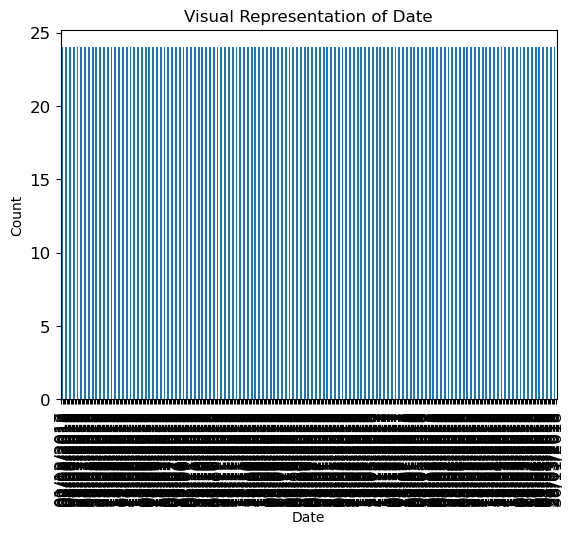

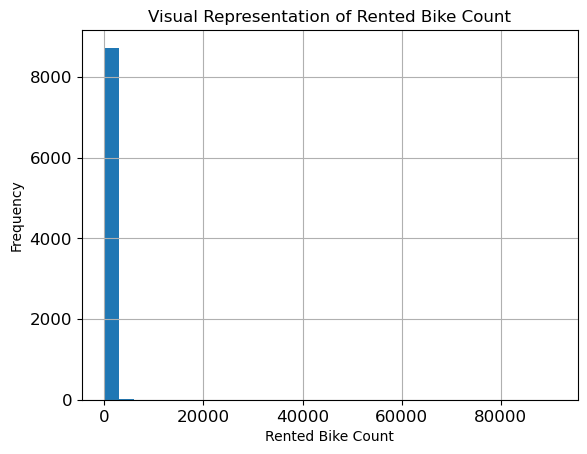

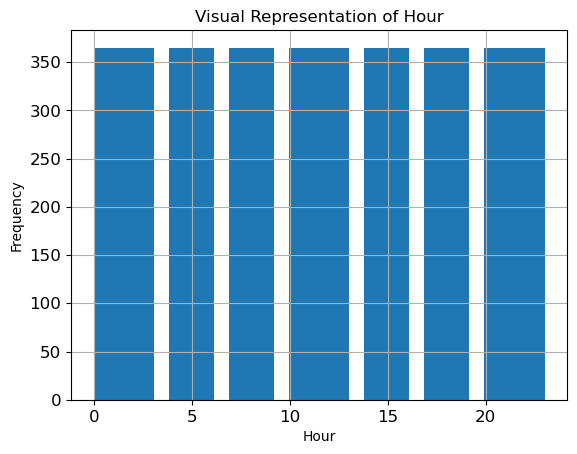

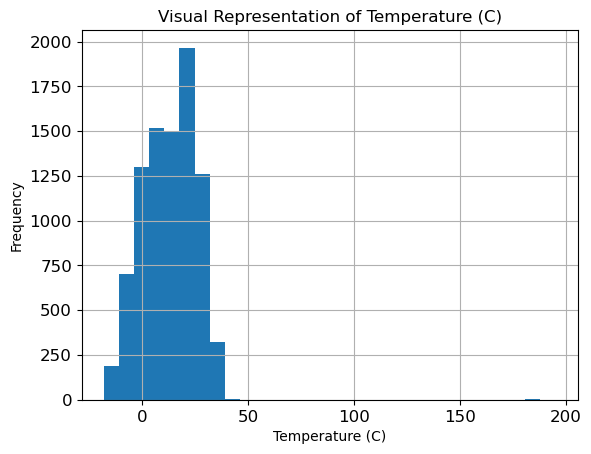

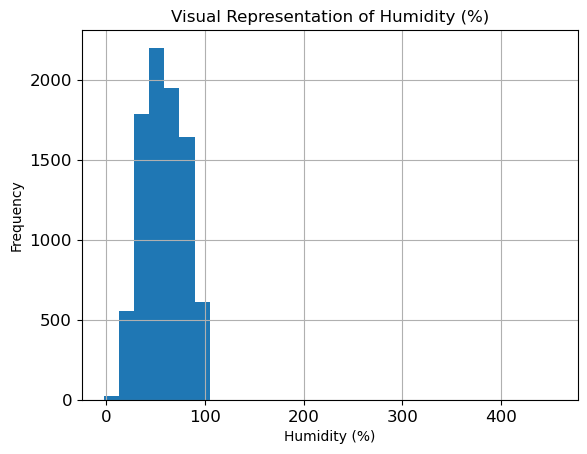

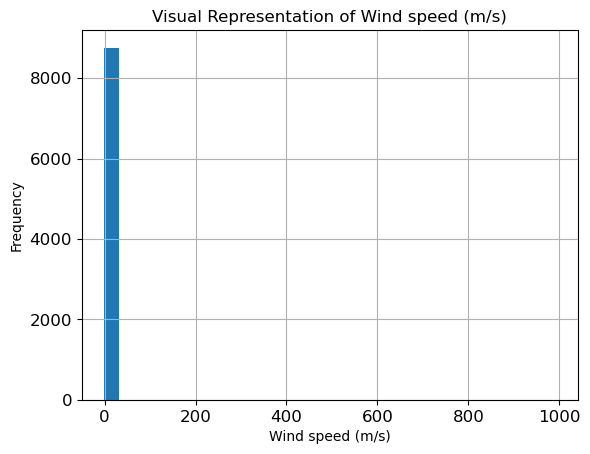

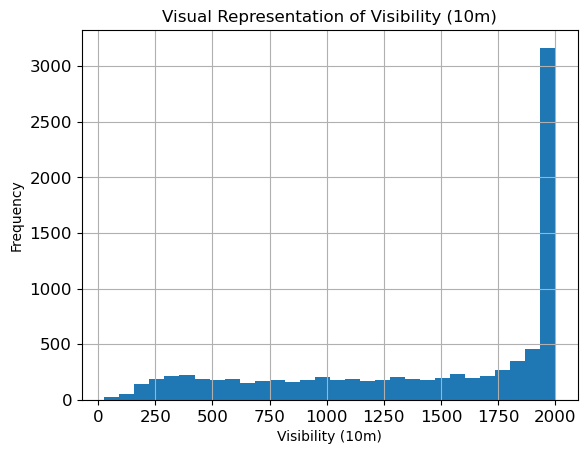

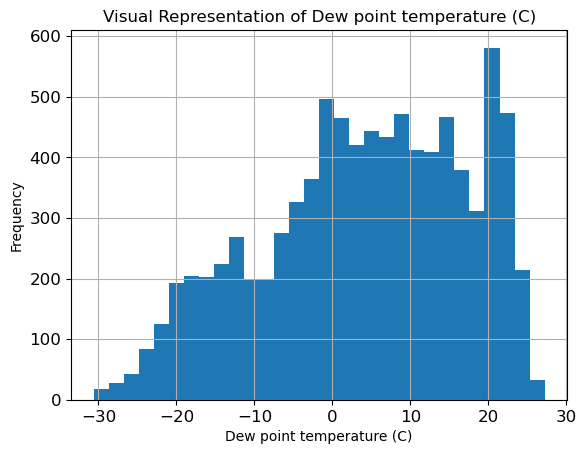

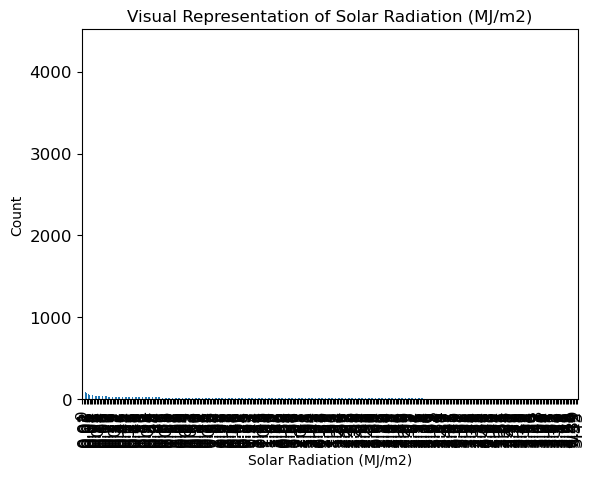

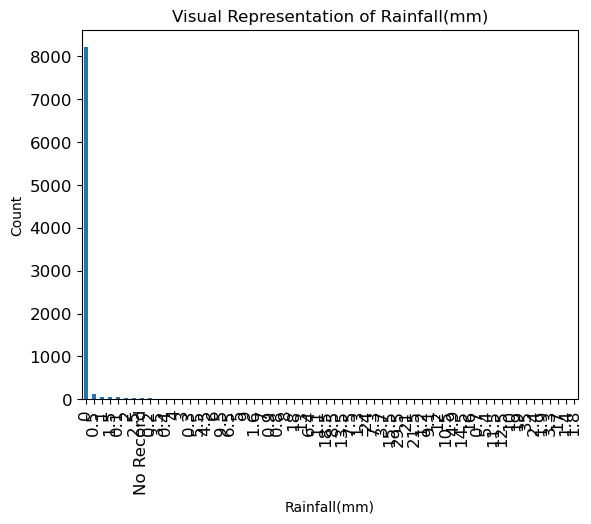

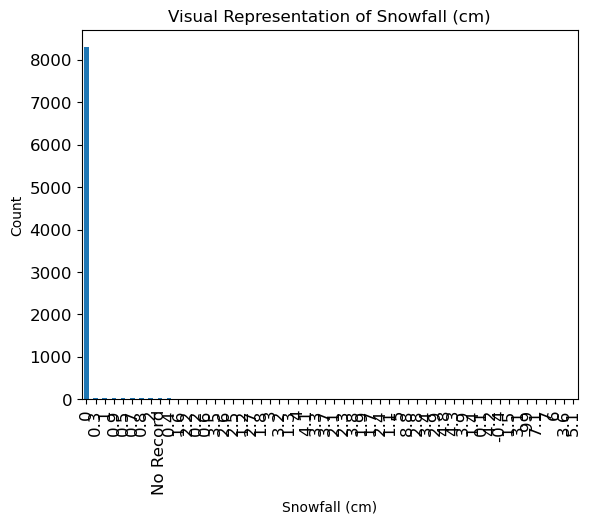

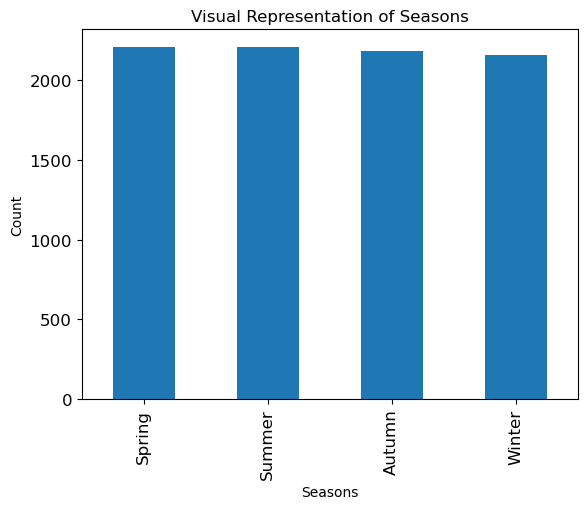

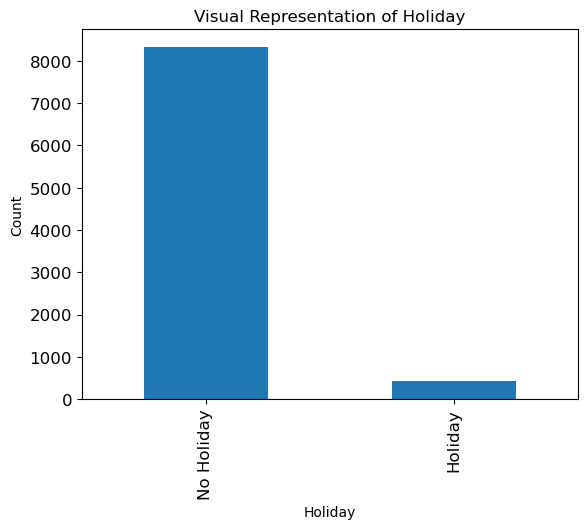

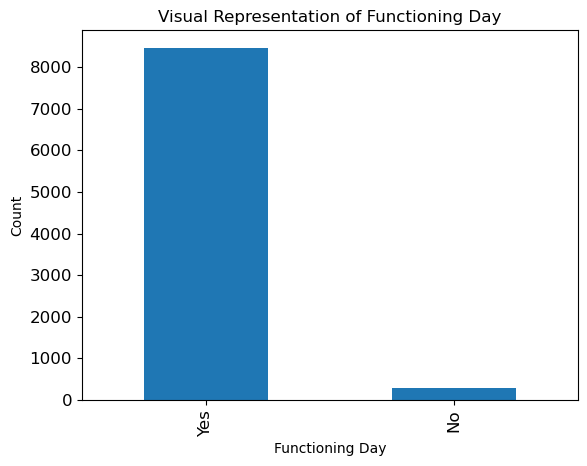

In [3]:
features = df.columns
for i in features:
    plt.figure()
    if df[i].dtype in ['int64', 'float64']: # numerical data to histogram
        df[i].hist(bins=30)
        plt.title(f'Visual Representation of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
    else:
        df[i].value_counts().plot(kind='bar') # bar chart for value counts
        plt.title(f'Visual Representation of {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
    plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [4]:
# ## Example code for weekday feature mapping ##

# import datetime
# def date_is_weekday(datestring):
#     ### return 0 if weekend, 1 if weekday
#     dsplit = datestring.split('/')
#     wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
#     return int(wday<=4)

In [5]:
'''Using the "Functioning day" feature, removing rows from the DataFrame where the business is 
closed and then deleting the Functioning Day feature from the DataFrame. '''

filtered_data = df[df["Functioning Day"] == "Yes"] # Removing rows from the DataFrame where the business is closed
filtered_data.drop(columns=['Functioning Day'], inplace=True) # Deleting the Functioning Day feature from the DataFrame.
filtered_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_7724\3416397167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['Functioning Day'], inplace=True) # Deleting the Functioning Day feature from the DataFrame.


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday


In [6]:
# Converting seasons to a one hot encoded format (1 binary feature for each of the 4 seasons).
one_hot_encoded_data = pd.get_dummies(filtered_data, columns=['Seasons'])
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

one_hot_encoded_data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1


In [7]:
# Replacing the Date feature with a binary Weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

# Applying the function to create the 'Weekday' feature
one_hot_encoded_data['Weekday'] = one_hot_encoded_data['Date'].apply(date_is_weekday)
one_hot_encoded_data.drop(columns=['Date'], inplace=True) #Dropping the date column now

one_hot_encoded_data.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,No Holiday,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,No Holiday,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,No Holiday,0,0,0,1,1


In [8]:
## Converting remaining non-numerical 'Holiday' to a numerical format
one_hot_encoded_data['Holiday'] = one_hot_encoded_data['Holiday'].map({'Holiday': 1, 'No Holiday': 0}).astype(int)
one_hot_encoded_data.head()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,0,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,0,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,0,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,0,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,0,0,0,0,1,1


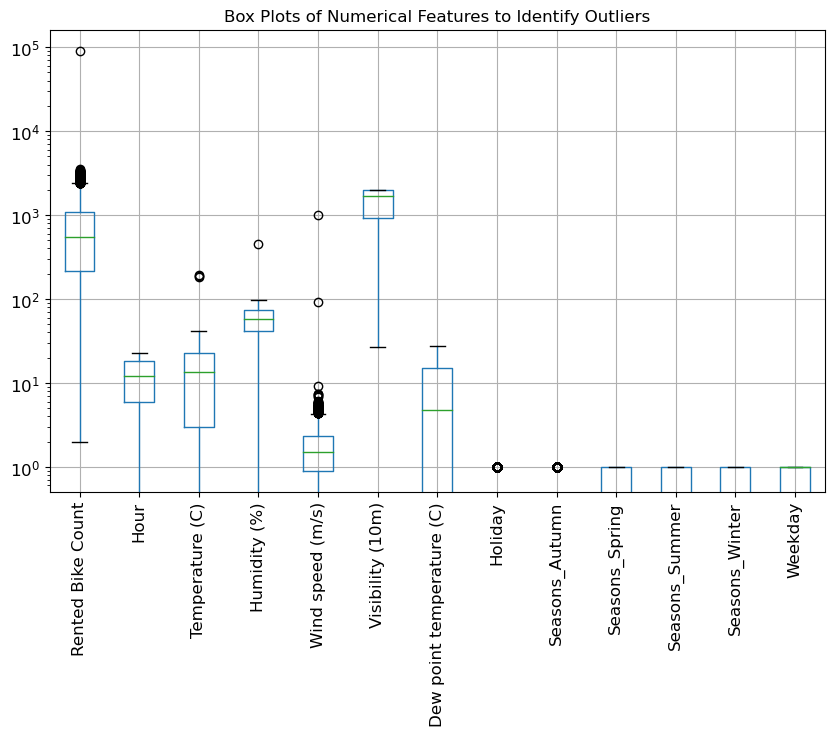

In [9]:
# Checking outliers
num_cols = one_hot_encoded_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
one_hot_encoded_data[num_cols].boxplot(rot=90)
plt.yscale('log')
plt.title('Box Plots of Numerical Features to Identify Outliers')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Fixing outliers
def outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25) # 1st quartile
        Q3 = df[column].quantile(0.75) # 3rd quartile
        IQR = Q3 - Q1 # interquartile range
        
        # Calculating the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        
        # Let's replace the outliers with median
        median = df[column].median()
        df.loc[outliers, column] = median

    return df
    
cleaned_df = outliers(one_hot_encoded_data)

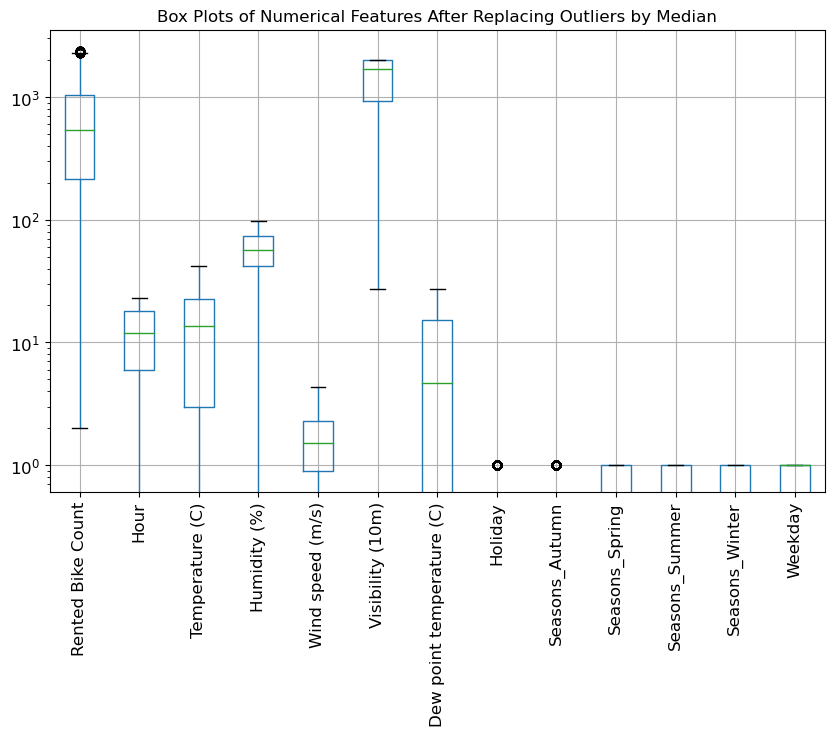

In [11]:
# Ploting after replacing outliers with median
num_cols_wo_outliers = cleaned_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
cleaned_df[num_cols_wo_outliers].boxplot(rot=90)
plt.yscale('log')
plt.title('Box Plots of Numerical Features After Replacing Outliers by Median')
plt.xticks(rotation=90)
plt.show()

In [12]:
cleaned_df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,690.148021,11.507029,12.774483,58.143390,1.664005,1433.873479,3.944997,0.048198,0.228825,0.255168,0.260839,0.255168,0.711636
std,582.672997,6.920899,12.106964,20.494092,0.937647,609.051229,13.242399,0.214198,0.420101,0.435982,0.439118,0.435982,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1041.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2387.000000,23.000000,42.000000,98.000000,4.300000,2000.000000,27.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Applying the pipeline to the numeric columns
cleaned_df[num_cols_wo_outliers] = pipeline.fit_transform(cleaned_df[num_cols_wo_outliers])

# Converting remaining non-numeric features to numerical or replace non-numeric values with NaN
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

for column in cleaned_df.select_dtypes(include=['object']).columns:
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

cleaned_df = cleaned_df.apply(pd.to_numeric, errors='coerce')

# Saving the Cleaned data
cleaned_df.to_csv('CleanedSeoulBikeData.csv', index=False)

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [14]:
### Your code and outputs here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 'Rented Bike Count' is our target variable
X = cleaned_df.drop('Rented Bike Count', axis=1) 
y = cleaned_df['Rented Bike Count'] 

# Spliting the data appropriately so that 20% of it will be kept as a hold-out test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Defining the pipeline for imputation and linear regression
lr_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train) # Fitting the pipeline

y_train_pred = lr_pipeline.predict(X_train) # Predicting the terget value

# RMSE on the training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE (Training): {train_rmse}")

# Baseline RMSE
baseline_pred = np.full_like(y_train, y_train.mean()) # Reference: https://numpy.org/doc/stable/reference/generated/numpy.full_like.html
baseline_rmse = np.sqrt(mean_squared_error(y_train, baseline_pred))
print(f"RMSE (Baseline): {baseline_rmse}")

RMSE (Training): 405.74528214543045
RMSE (Baseline): 584.6344739144424


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


### Your ChatGPT prompt

Hi, Please help me fitting a linear regression and suppport vector regrassion model unsing 10-fold cross validation for each to find mean and standard deviation of the RMSE values.

How to do hyper-parameter optimisation using gridsearch?

mean and standard deviation of the RMSE values after optimisation?

Visualise the result so that I can compare which model is the best.

In [15]:
# Define the pipeline for imputation and SVR
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer

pipeline_svr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', SVR())
])

# Define a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 10-fold cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_pipeline, X, y, cv=10, scoring=rmse_scorer)
print(f"Linear Regression 10-fold CV RMSE: Mean = {cv_scores_lr.mean()}, Std Dev = {cv_scores_lr.std()}")

# Perform 10-fold cross-validation for SVR
cv_scores_svr = cross_val_score(pipeline_svr, X, y, cv=10, scoring=rmse_scorer)
print(f"SVR 10-fold CV RMSE: Mean = {cv_scores_svr.mean()}, Std Dev = {cv_scores_svr.std()}")

Linear Regression 10-fold CV RMSE: Mean = 406.2302797610579, Std Dev = 121.38802792325113
SVR 10-fold CV RMSE: Mean = 599.771705261443, Std Dev = 162.46988062822842


In [16]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for Linear Regression (no hyperparameters to tune for simple linear regression)
param_grid_lr = {}

# Define parameter grid for SVR with limited parameter values
param_grid_svr = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.01, 0.1],
    'regressor__kernel': ['linear', 'rbf']
}

In [17]:
# Perform GridSearchCV for Linear Regression
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=10, scoring=rmse_scorer)
grid_search_lr.fit(X, y)
print(f"Linear Regression - Mean RMSE (after optimisation): {grid_search_lr.cv_results_['mean_test_score'].mean()}")
print(f"Linear Regression - RMSE Standard Deviation (after optimisation): {grid_search_lr.cv_results_['std_test_score'].mean()}")

Linear Regression - Mean RMSE (after optimisation): 406.2302797610579
Linear Regression - RMSE Standard Deviation (after optimisation): 121.38802792325113


In [18]:
# Perform GridSearchCV for SVR
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=10, scoring=rmse_scorer, n_jobs=-1)
grid_search_svr.fit(X, y)
print(f"SVR - Mean RMSE (after optimisation): {grid_search_svr.cv_results_['mean_test_score'].mean()}")
print(f"SVR - RMSE Standard Deviation (after optimisation): {grid_search_svr.cv_results_['std_test_score'].mean()}")

SVR - Mean RMSE (after optimisation): 505.0171871522081
SVR - RMSE Standard Deviation (after optimisation): 152.59307782274627


Best model: Linear Regression


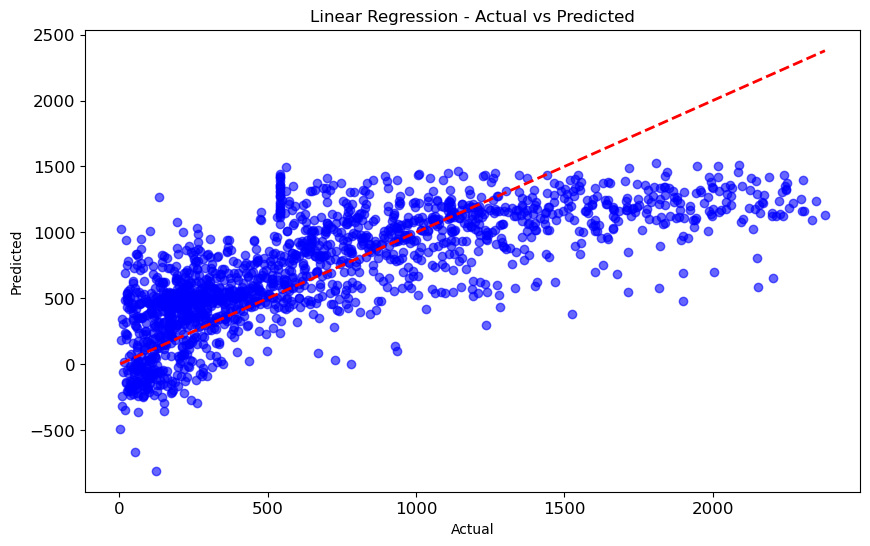

In [19]:
# Choose the best model based on mean RMSE
best_model = grid_search_lr if grid_search_lr.cv_results_['mean_test_score'].mean() < grid_search_svr.cv_results_['mean_test_score'].mean() else grid_search_svr
best_model_name = "Linear Regression" if best_model == grid_search_lr else "SVR"
print(f"Best model: {best_model_name}")

# Split the data into training and test sets for visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{best_model_name} - Actual vs Predicted')
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

### Your answer here (maximum of 200 words)
One challange I faced with the code from ChatGPT was it's runtime for grid_search_svr. I eventually reduced the CV to 3 to get an output. It took me hours to get the output for 10-fold cross validation. This might be overcomed by using other cross validation to inlcude RandomizedSearchCV since this samples a fixed number of parameter unlike GridSearchCV.